In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

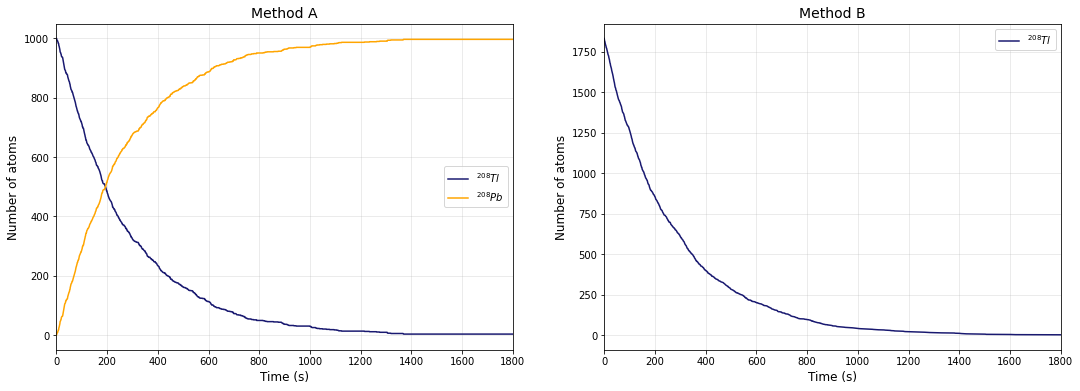

In [158]:
#Exercise n.1

#METHOD 1

def p1(t,tau):
    return 1-2**(-t/tau)

tau=3.052*60 #(in seconds)
T=int(10*tau)#considering the evolution of the system for approximately 10*tau

N_Tl=np.zeros(T)
N_Pb=np.zeros(T)
N_Tl[0]=1000 #number of Th atoms at t=0
N_Pb[0]=0 #number of Pb atoms at t=0

for i in range(0,T-1):
    prob=p1(1,tau) #timestep -> 1s
    N_Tl[i+1]=N_Tl[i]
    N_Pb[i+1]=N_Pb[i]
    for j in range (0, int(N_Tl[i])):
        a=np.random.rand()
        if a < prob: 
            N_Tl[i+1] += -1
            N_Pb[i+1] += 1


#plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax1.plot(np.arange(T), N_Tl, color='midnightblue', label=r'${}^{208}Tl$')
ax1.plot(np.arange(T), N_Pb, color='orange', label=r'${}^{208}Pb$')
ax1.set_title('Method A', fontsize=14)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Number of atoms', fontsize=12)
ax1.set_xlim(0,1800)
ax1.legend(loc='best')
ax1.grid(alpha=0.3)




#METHOD B

def p2(t,tau):
    return 2**(-t/tau)*np.log(2)/tau

def invcdf2(t,tau): #quantile function of p2(t)
    return -np.log(1-t)*tau/np.log(2)

#Getting 1000 random numbers following the p2(t) non-uniform probability distribution
s=np.random.uniform(0,1,T)
t=np.sort(invcdf2(s,tau))
n=range(T,0,-1)

#plot
ax2.plot(t, n, color='midnightblue', label=r'${}^{208}Tl$')
ax2.set_title('Method B', fontsize=14)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Number of atoms', fontsize=12)
ax2.set_xlim(0,1800)
ax2.legend(loc='best')
ax2.grid(alpha=0.3)

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

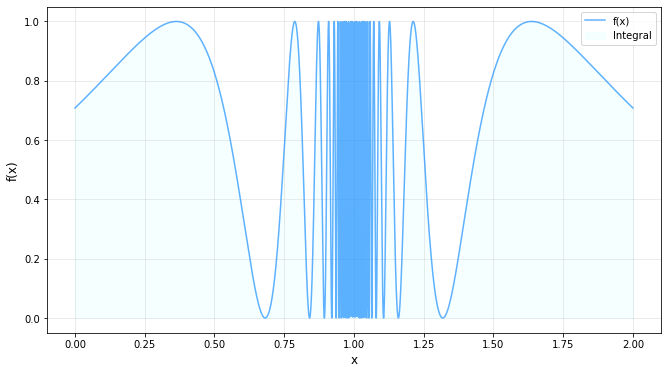

In [102]:
#Exercise n.2

def f(x):
    return pow((np.sin(1/(1-x))), 2)

#PLOTTING f(x)
N=10000
x=np.linspace(1e-6, 2-1e-6, N)
fig, ax=plt.subplots(figsize=(11, 6))
ax.plot(x, f(x), label='f(x)', color='dodgerblue', alpha=0.7)
ax.fill_between(x, f(x), where=[(x > 0)and(x < 2)for x in x], color='lightcyan', alpha=0.3, label='Integral')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_xlim(-0.1,2.1)
ax.legend(loc='best')
ax.grid(alpha=0.3)

In [107]:
#HIT/MISS METHOD

N, rep =100000, 100
integral_hm=[]

for i in range(rep): 
    count=0
    for j in range(N):
        x_1=2*np.random.random() 
        y=np.random.random()
        if y<f(x_1):
            count+=1
    integral_hm.append(2*count/N)

mean=np.mean(integral_hm)
err=np.std(integral_hm)/np.sqrt(rep)

print('HIT/MISS METHOD')
print('Repeating the integral %d times (over N=%d) the computed value is:' %(N, rep))
print('I=%.4f ± %.4f' %(mean, err))

HIT/MISS METHOD
Repeating the integral 100000 times (over N=100) the computed value is:
I=1.3465 ± 0.0003


In [109]:
#MEAN VALUE METHOD

integral_mv=2*np.sum(f(x))/N  #V=b-a=2
err=2*np.sqrt((np.sum(f(x)**2)/N-np.sum(f(x)/N)**2)/N)

print('MEAN VALUE METHOD')
print('The computed integral is:')
print('I=%.4f ± %.4f' % (integral_mv, err))

MEAN VALUE METHOD
The computed integral is:
I=0.1348 ± 0.0014


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [44]:
#Exercise n.3

#Defining a function to compute the volume of an hypersphere in the range [1,-1] in each dimension
def hsp_volume(dim, N):
    x=np.random.uniform(-1, 1, (N, dim))
    square=np.sum(np.power(x,2), axis=1) #summing all the x square
    vol=pow(2,dim)*np.sum(square<=1)/N #volume
    return vol


#2D
print('The true value of the area of a circle of unit radius is: %.5f.' %np.pi)
print('The computed area is: %.5f.' %hsp_volume(2,1000000)) #dim=2, N=1e6
print('The relative error is: %.4f%%.\n' %((np.abs(I-I_tr)/I_tr)*100))


#10D
vol_10_tr=pow(np.pi,5)/(120)
vol_10=hsp_volume(10,10000000) #dim=10, N=1e7
print('The true value of the volume of an hypersphere of unit radius is: %.5f.' %vol_10_tr)
print('The computed volume is: %.5f.' %vol_10)
print('The relative error is: %.4f%%.' %((np.abs(vol_10-vol_10_tr)/vol_10_tr)*100))

The true value of the area of a circle of unit radius is: 3.14159.
The computed area is: 3.14232.
The relative error is: 0.0099%.

The true value of the volume of an hypersphere of unit radius is: 2.55016.
The computed volume is: 2.54280.
The relative error is: 0.2889%.


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [3]:
#Exercise n.4
def w(x):
    return 1/(np.sqrt(x))

def f(x):
    return pow(x,-0.5)/(np.exp(x)+1)

I_tr=0.838932960013381
print('The true value is: %.7f.' %I_tr)

N=1000000
x=np.random.rand(N)**2
I=2/N*np.sum(f(x)/w(x))

print('The computed value is: %.7f.\n' %I)
print('The relative error is: %.4f%%.' %((np.abs(I-I_tr)/I_tr)*100))

The true value is: 0.8389330.
The computed value is: 0.8389347.

The relative error is: 0.0002%.
